# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=98d08ee6b90453f8454fd09764bdc2d2'

In [5]:
weather_response = requests.get(target_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "city": {
        "coord": {
            "lat": 55.7522,
            "lon": 37.6156
        },
        "country": "RU",
        "id": 524901,
        "name": "Moscow",
        "population": 0,
        "sunrise": 1613106062,
        "sunset": 1613140002,
        "timezone": 10800
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 95
            },
            "dt": 1613098800,
            "dt_txt": "2021-02-12 03:00:00",
            "main": {
                "feels_like": 251.58,
                "grnd_level": 998,
                "humidity": 86,
                "pressure": 1017,
                "sea_level": 1017,
                "temp": 258.5,
                "temp_kf": 0.06,
                "temp_max": 258.5,
                "temp_min": 258.44
            },
            "pop": 1,
            "snow": {
                "3h": 1.53
            },
            "sys": {
                "pod": "n"
            },
            "vis

In [6]:
print(weather_json['city']['name'])

Moscow


In [7]:
# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

#  response = requests.get(query_url + city).json()
    
# Loop through the list of cities and perform a request for data on each

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
print("I made it through the gauntlet. The message survived!")

Processing record 1 of Set 1 | hanzhong
Processing record 2 of Set 1 | la ronge
Processing record 3 of Set 1 | souillac
Processing record 4 of Set 1 | kibungan
Processing record 5 of Set 1 | provideniya
Processing record 6 of Set 1 | bengkulu
Processing record 7 of Set 1 | mehamn
Processing record 8 of Set 1 | pisco
Processing record 9 of Set 1 | torbay
Processing record 10 of Set 1 | albany
Processing record 11 of Set 1 | gamba
Processing record 12 of Set 1 | port alfred
Processing record 13 of Set 1 | dwarka
Processing record 14 of Set 1 | nikolskoye
Processing record 15 of Set 1 | mataura
Processing record 16 of Set 1 | hermanus
Processing record 17 of Set 1 | castro
Processing record 18 of Set 1 | saint-francois
Processing record 19 of Set 1 | arraial do cabo
Processing record 20 of Set 1 | lapua
Processing record 21 of Set 1 | jamestown
Processing record 22 of Set 1 | iqaluit
Processing record 23 of Set 1 | mustla
Processing record 24 of Set 1 | fukue
Processing record 25 of Set 1

Processing record 192 of Set 1 | tuatapere
Processing record 193 of Set 1 | aklavik
Processing record 194 of Set 1 | makat
Processing record 195 of Set 1 | opuwo
Processing record 196 of Set 1 | severo-kurilsk
Processing record 197 of Set 1 | georgetown
Processing record 198 of Set 1 | diamantino
Processing record 199 of Set 1 | masuguru
Processing record 200 of Set 1 | ancud
Record not found
Record not found
Processing record 201 of Set 1 | husavik
Processing record 202 of Set 1 | ocampo
Record not found
Processing record 203 of Set 1 | shache
Processing record 204 of Set 1 | zholymbet
Record not found
Record not found
Processing record 205 of Set 1 | katsuura
Record not found
Processing record 206 of Set 1 | seydi
Processing record 207 of Set 1 | pevek
Processing record 208 of Set 1 | aripuana
Processing record 209 of Set 1 | vila franca do campo
Processing record 210 of Set 1 | quatre cocos
Processing record 211 of Set 1 | lompoc
Processing record 212 of Set 1 | price
Record not fou

Processing record 380 of Set 1 | suluktu
Processing record 381 of Set 1 | christchurch
Processing record 382 of Set 1 | villacarrillo
Processing record 383 of Set 1 | miquelon
Processing record 384 of Set 1 | sainte-marie
Processing record 385 of Set 1 | te anau
Processing record 386 of Set 1 | buraydah
Processing record 387 of Set 1 | sungai padi
Processing record 388 of Set 1 | port blair
Processing record 389 of Set 1 | vardo
Processing record 390 of Set 1 | tura
Processing record 391 of Set 1 | sarti
Processing record 392 of Set 1 | marawi
Processing record 393 of Set 1 | half moon bay
Processing record 394 of Set 1 | ondo
Processing record 395 of Set 1 | matara
Processing record 396 of Set 1 | knysna
Processing record 397 of Set 1 | kayasula
Processing record 398 of Set 1 | kabare
Processing record 399 of Set 1 | ola
Processing record 400 of Set 1 | gunnedah
Processing record 401 of Set 1 | teteven
Processing record 402 of Set 1 | orje
Processing record 403 of Set 1 | saint-paul
P

Processing record 567 of Set 1 | fort nelson
Processing record 568 of Set 1 | hamilton
Processing record 569 of Set 1 | rawson
Processing record 570 of Set 1 | praia da vitoria
Processing record 571 of Set 1 | harker heights
Processing record 572 of Set 1 | akdepe
Processing record 573 of Set 1 | fare
Processing record 574 of Set 1 | praia
Processing record 575 of Set 1 | luis correia
I made it through the gauntlet. The message survived!


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert array of JSONs into Pandas DataFrame


weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hanzhong,33.0728,107.0303,59.23,56,4,3.18,CN,1613098800
1,La Ronge,55.1001,-105.2842,-13.97,76,100,10.33,CA,1613098800
2,Souillac,-20.5167,57.5167,78.60,74,87,11.41,MU,1613098800
3,Kibungan,16.6950,120.6553,73.96,78,27,4.27,PH,1613098800
4,Provideniya,64.3833,-173.3000,-7.96,73,55,19.77,RU,1613098800


In [9]:

# Export the City_Data into a csv
weather_data.to_csv(r'..\output_data\my_weather_data.csv')
# Show Record Count
countforme = len(weather_data)
countforme

575

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

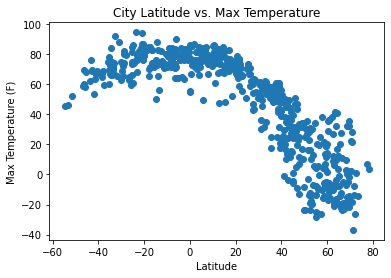

In [12]:

# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
# Save the figure
# Show plot
scatlat = weather_data["Latitude"]
scattemp = weather_data["Max Temp"]

plt.scatter(scatlat,scattemp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatplotlatitudemaxtemp')
plt.show()

#This code is analyzing the max temperature of each city and latitude.

## Latitude vs. Humidity Plot

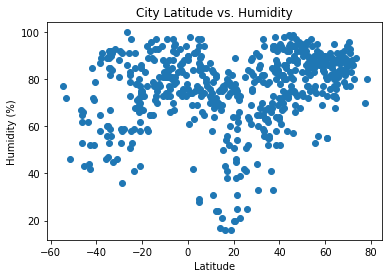

In [13]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
# Save the figure
# Show plot

#scatlat = weather_data["Latitude"]
scathum = weather_data["Humidity"]

plt.scatter(scatlat,scathum)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplotlatitudehumidity')
plt.show()

## Latitude vs. Cloudiness Plot

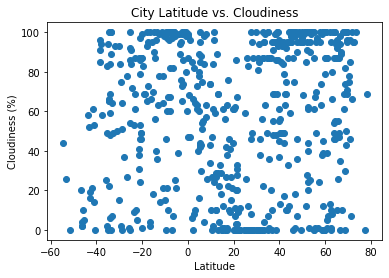

In [14]:

# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
# Save the figure
# Show plot
#scatlat = weather_data["Latitude"]
scatcloud = weather_data["Cloudiness"]

plt.scatter(scatlat,scatcloud)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplotlatitudecloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

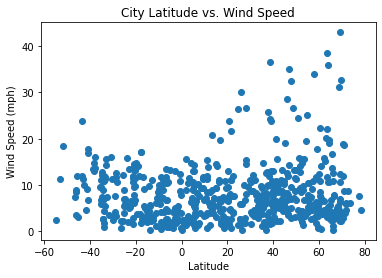

In [15]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
# Save the figure
# Show plot

#scatlat = weather_data["Latitude"]
scatwindsp = weather_data["Wind Speed"]

plt.scatter(scatlat,scatwindsp)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatplotlatitudewindspeed')
plt.show()

## Linear Regression

In [16]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [17]:
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hanzhong,33.0728,107.0303,59.23,56,4,3.18,CN,1613098800
1,La Ronge,55.1001,-105.2842,-13.97,76,100,10.33,CA,1613098800
3,Kibungan,16.6950,120.6553,73.96,78,27,4.27,PH,1613098800
4,Provideniya,64.3833,-173.3000,-7.96,73,55,19.77,RU,1613098800
6,Mehamn,71.0357,27.8492,21.78,91,85,8.66,NO,1613098800


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8758965812044499


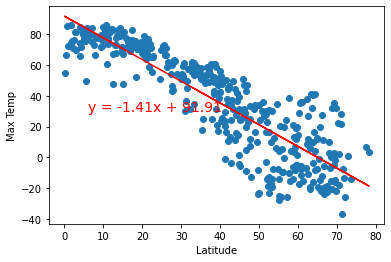

<Figure size 432x288 with 0 Axes>

In [18]:

x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northerntemplat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4739093531097445


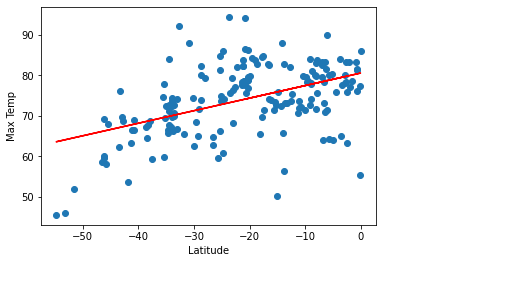

The high r value indicates a strong positive correlation between latitude and max temperature.


<Figure size 432x288 with 0 Axes>

In [19]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southerntemplat')

print("The high r value indicates a strong positive correlation between latitude and max temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3883048518054837


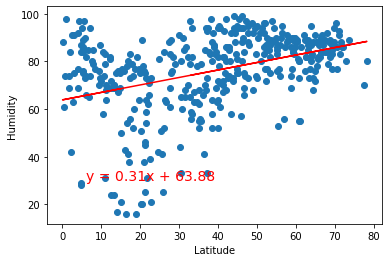

<Figure size 432x288 with 0 Axes>

In [20]:

x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernhumlat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3839293753162692


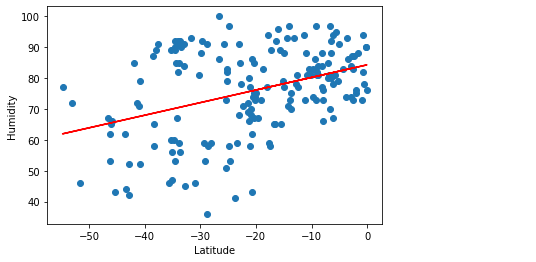

The low r values indicate a weak to no relationship between humidity and latitude.


<Figure size 432x288 with 0 Axes>

In [21]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southernhumlat')

print("The low r values indicate a weak to no relationship between humidity and latitude.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24476168180356167


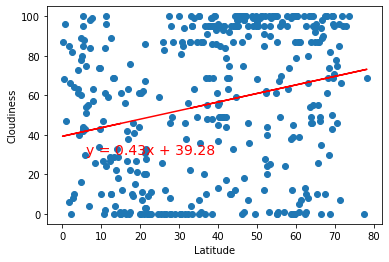

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northerncloudlat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3863537524792914


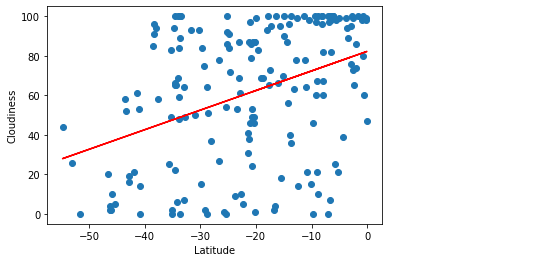

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southerncloudlat')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13101089130769036


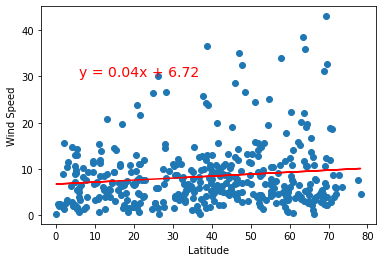

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northernwindlat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3292052258278316


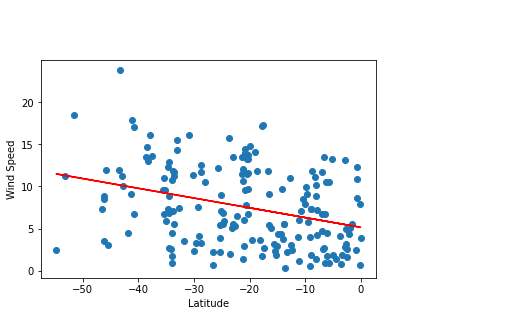

<Figure size 432x288 with 0 Axes>

In [25]:

x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernwindlat')